<a href="https://colab.research.google.com/github/anakel/WorkEarly/blob/master/Final_Assignment_Python_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Imports**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# **Reading file,descriptions,shapes,etc**

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/finalassignmentworkearly.csv")

In [5]:
df.shape

(74, 24)

In [6]:
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-23548800092,2019-11-27 00:00:00,2601,Hy-Vee Food Store / Fairfield,1300 West Burlington Ave,Fairfield,52556.0,POINT (-91.978702 41.006456),51,JEFFERSON,...,86251,Juarez Triple Sec,12,1000,2.42,3.63,6,21.78,6.00,1.58
1,INV-23609300026,2019-12-02 00:00:00,4962,Hilltop Grocery,1312 Harrison St,Davenport,52803.0,NaN,82,SCOTT,...,41844,Everclear Alcohol,24,375,4.20,6.30,3,18.90,1.12,0.29
2,S30390600011,2016-01-26 00:00:00,2641,Hy-Vee Drugstore / Council Bluffs,757 W BROADWAY,COUNCIL BLUFFS,51501.0,POINT (-95.855054 41.261673),78,Pottawattamie,...,81124,99 Peppermint Mini,10,600,5.94,8.91,2,17.82,1.20,0.32
3,S30348700047,2016-01-25 00:00:00,3162,Nash Finch / Wholesale Food,807 GRANDVIEW,MUSCATINE,52761.0,POINT (-91.06411300000002 41.408437),70,Muscatine,...,82847,Dekuyper Peachtree,12,1000,7.62,11.43,4,45.72,4.00,1.06
4,S30466200002,2016-02-01 00:00:00,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14TH ST,DES MOINES,50320.0,POINT (-93.596754 41.554101),77,Polk,...,973627,Di Amore Quattro Orange,12,1000,9.75,14.63,120,1755.60,120.00,31.70


In [7]:
df.dtypes

invoice_and_item_number     object
date                        object
store_number                 int64
store_name                  object
address                     object
city                        object
zip_code                   float64
store_location              object
county_number                int64
county                      object
category                     int64
category_name               object
vendor_number                int64
vendor_name                 object
item_number                  int64
item_description            object
pack                         int64
bottle_volume_ml             int64
state_bottle_cost          float64
state_bottle_retail        float64
bottles_sold                 int64
sale_dollars               float64
volume_sold_liters         float64
volume_sold_gallons        float64
dtype: object

#**Calculation of most popular liquor per zip code**

In [20]:
grouped_df=df.groupby(['zip_code']).sum().sort_values('bottles_sold', ascending=False)

In [9]:
grouped_df.head(1)

,store_number,county_number,category,vendor_number,item_number,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
zip_code,,,,,,,,,,,,,
52314.0,10204,114,2173800,868,150174,24,2000,9.92,14.88,1560,11620.8,1560.0,412.1


In [34]:
popular=df.groupby(["zip_code","item_description"], as_index=False).agg(
   
    sales = ("bottles_sold", "sum")
    
)
popular.sort_values(['sales'],ascending=False)

,zip_code,item_description,sales
59,52314.0,Juarez Gold Dss,1560
30,50702.0,Tortilla Gold Dss,768
0,50010.0,Member's Mark Spiced Rum,288
11,50314.0,Juarez Triple Sec,240
38,51106.0,Kahlua Coffee Liqueur,240
...,...,...,...
50,51555.0,Paramount Gold Rum,2
71,52804.0,Martell VSSD,2
31,50703.0,Bacardi Gold,1
54,52172.0,Kahlua Coffee,1


In [46]:
sales_size=popular.iloc[:,-1].values
print(sales_size)

[ 288    4  108   48   24    3    6   84   72   90   60  240   24   24
   48   24  120   66   72  102   48   18   30  108    4    8    7    4
    2   18  768    1   24  180   24   60    5  144  240   84    5    6
   48   12   18    4    2    4   48    7    2    4    5    2    1   60
   18    1   48 1560   90  216    7   36    6   48   24   36   24    4
    3    2]


#**Plotting Results**

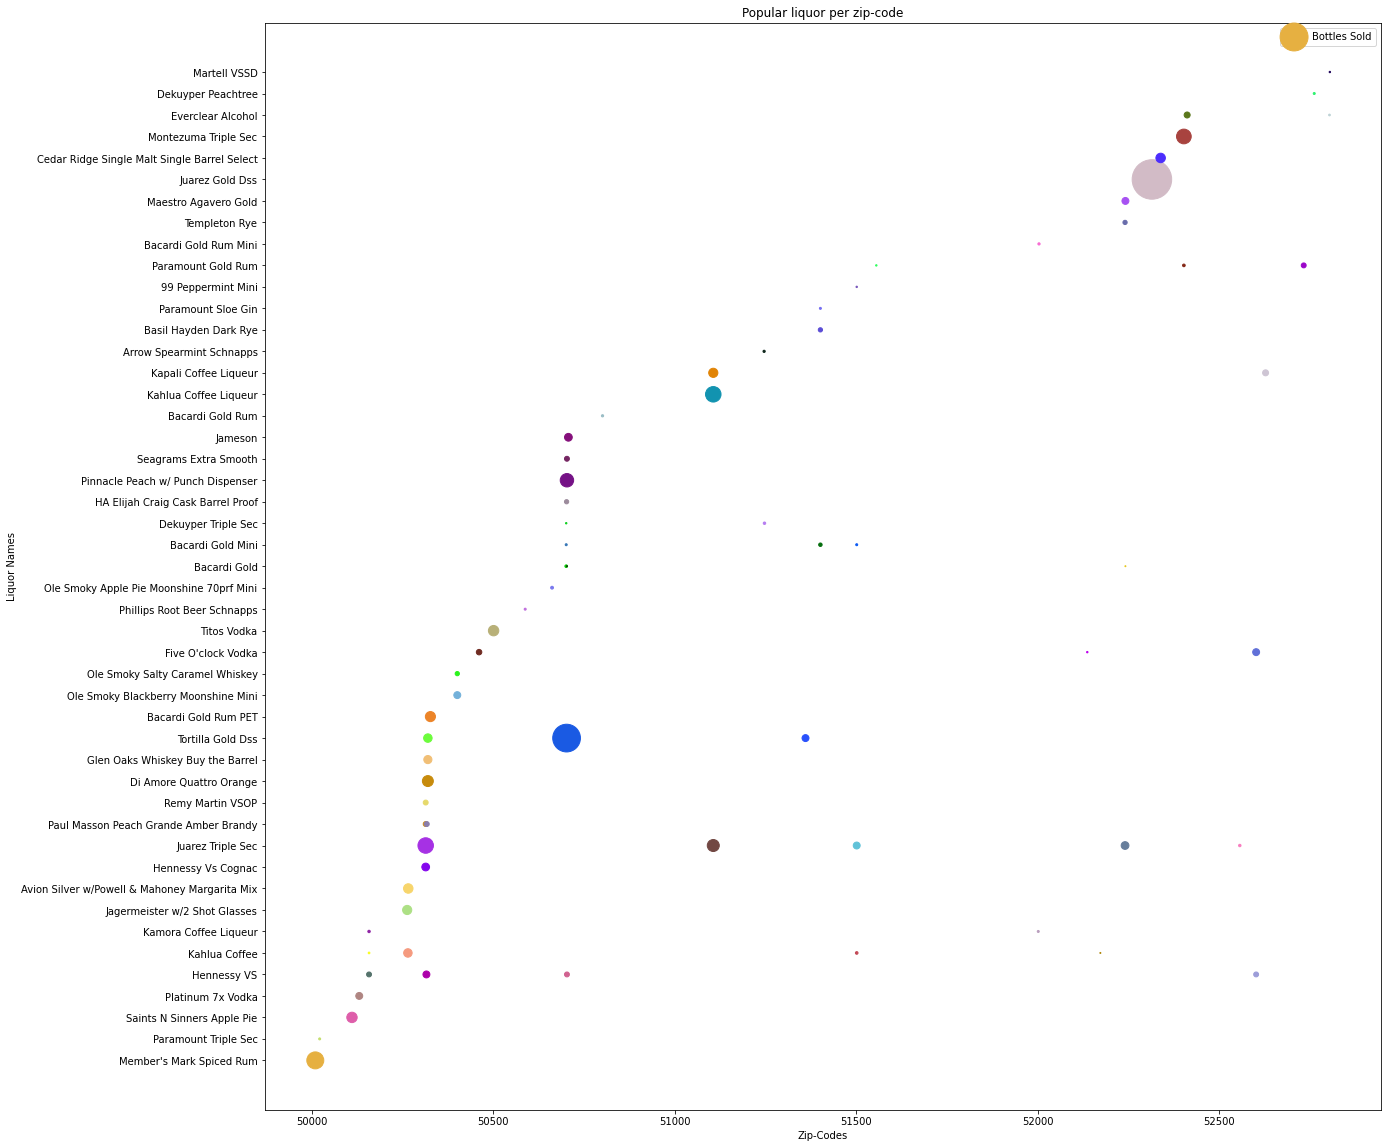

In [57]:

plt.figure(figsize=(20,20))
plt.scatter(popular.zip_code, popular.item_description, s=sales_size, c=np.random.rand(len(popular),3))
plt.xlabel("Zip-Codes")
plt.ylabel("Liquor Names")
plt.title("Popular liquor per zip-code")
plt.legend(["Bottles Sold"])
plt.show()

# **Calculating Percentage of sales per store.**

In [58]:
total_sales = df['bottles_sold'].sum()
percentiles = (df.groupby(by='store_name')['bottles_sold'].sum().sort_values(ascending=True) / total_sales) * 100

#**Plotting Result**

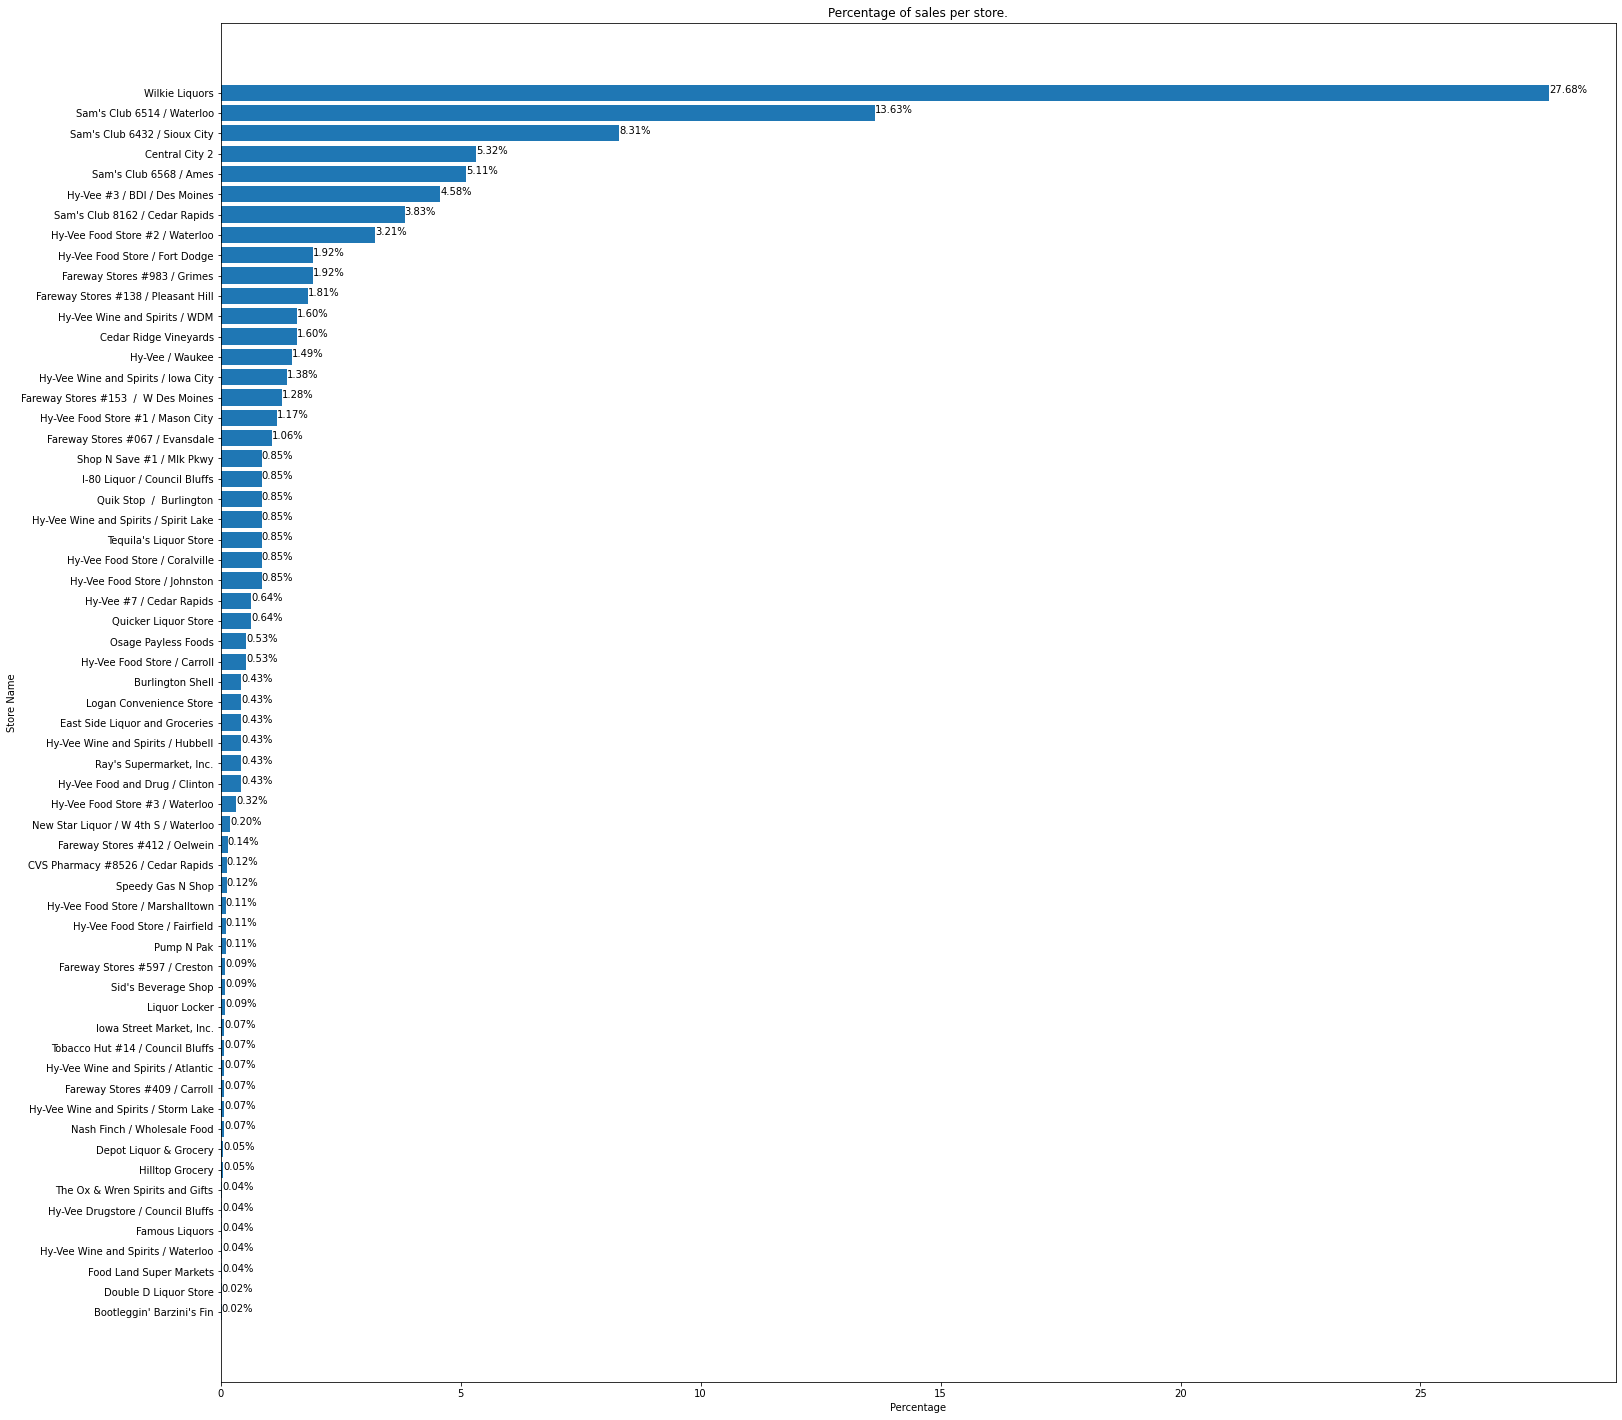

In [78]:
plt.figure(figsize=(25,25))

for index, value in enumerate(percentiles):
  plt.text(value, index, f"{value:.2f}%")

plt.barh(percentiles.index, percentiles)

plt.title('Percentage of sales per store.')
plt.xlabel('Percentage')
plt.ylabel('Store Name')


plt.show()